<a href="https://colab.research.google.com/github/carloshvmedeiros/machine_learning_python/blob/main/regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LINEAR REGRESSION

In [1]:
# Data visualization and manipulation libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Request URL lib
import requests

# Model lib
from sklearn.linear_model import LinearRegression, Ridge, Lasso

#Model evaluation functions
from sklearn.metrics import  mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Attempt to read the file to understand its structure
file_url = 'https://raw.githubusercontent.com/carloshvmedeiros/machine_learning_python/refs/heads/main/dataset/house.dat'

response = requests.get(file_url)
content = response.text.splitlines()

In [3]:
# Extract attribute names from the file
attributes = []
for line in content:
    if line.startswith('@attribute'):
        # Extract attribute name between '@attribute' and 'real'
        attr_name = line.split(' ')[1]
        attributes.append(attr_name)
    elif line.startswith('@data'):
        # Break once we reach the data section
        break

# Extract data portion
data_start_index = content.index('@data') + 1
data_lines = content[data_start_index:]

# Create the DataFrame using the extracted attributes and data
data = [line.strip().split(',') for line in data_lines]
df = pd.DataFrame(data, columns=attributes)

# Convert numeric columns to appropriate types
df = df.apply(pd.to_numeric, errors='coerce')

In [4]:
df

,P1,P5p1,P6p2,P11p4,P14p9,P15p1,P15p3,P16p2,P18p2,P27p4,H2p2,H8p2,H10p1,H13p1,H18pA,H40p4,Price
0,3961,0.476395,0.003534,0.123454,0.093057,0.885887,0.021712,0.773015,0.002811,0.024596,0.046247,0.003514,0.995784,0.182976,0.101093,0.384615,125500
1,2199,0.450659,0.343793,0.197362,0.165563,0.853115,0.023647,0.694411,0.001189,0.013080,0.146193,0.321046,0.992866,0.271066,0.118518,0.777778,19100
2,74,0.527027,0.000000,0.283784,0.171429,0.783784,0.000000,0.529412,0.000000,0.000000,0.381818,0.000000,1.000000,0.327273,0.200000,0.000000,14999
3,239,0.430962,0.000000,0.075314,0.066176,0.949791,0.000000,0.860760,0.000000,0.012658,0.024691,0.000000,1.000000,0.308642,0.300000,0.000000,38000
4,1892,0.508985,0.000528,0.211417,0.100108,0.799154,0.003171,0.634434,0.007076,0.067217,0.258093,0.001179,0.988208,0.554681,0.060060,0.333333,38600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22779,2515,0.479125,0.000398,0.120080,0.090076,0.895427,0.000795,0.764579,0.005400,0.035637,0.019068,0.000000,0.993521,0.268008,0.044728,0.000000,56700
22780,1106,0.489150,0.010850,0.195298,0.153982,0.744123,0.135624,0.688608,0.000000,0.025316,0.031863,0.000000,0.997468,0.379902,0.040323,1.000000,35400
22781,70580,0.473477,0.416364,0.132304,0.115737,0.836894,0.023193,0.683871,0.004512,0.039083,0.101494,0.359761,0.990229,0.357861,0.101578,0.620137,36300
22782,4215,0.487307,0.016845,0.071412,0.056455,0.679478,0.229656,0.744262,0.000820,0.049180,0.052059,0.018853,0.989344,0.438228,0.097264,0.250000,45900


In [5]:
X = df.drop(['Price'], axis = 1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

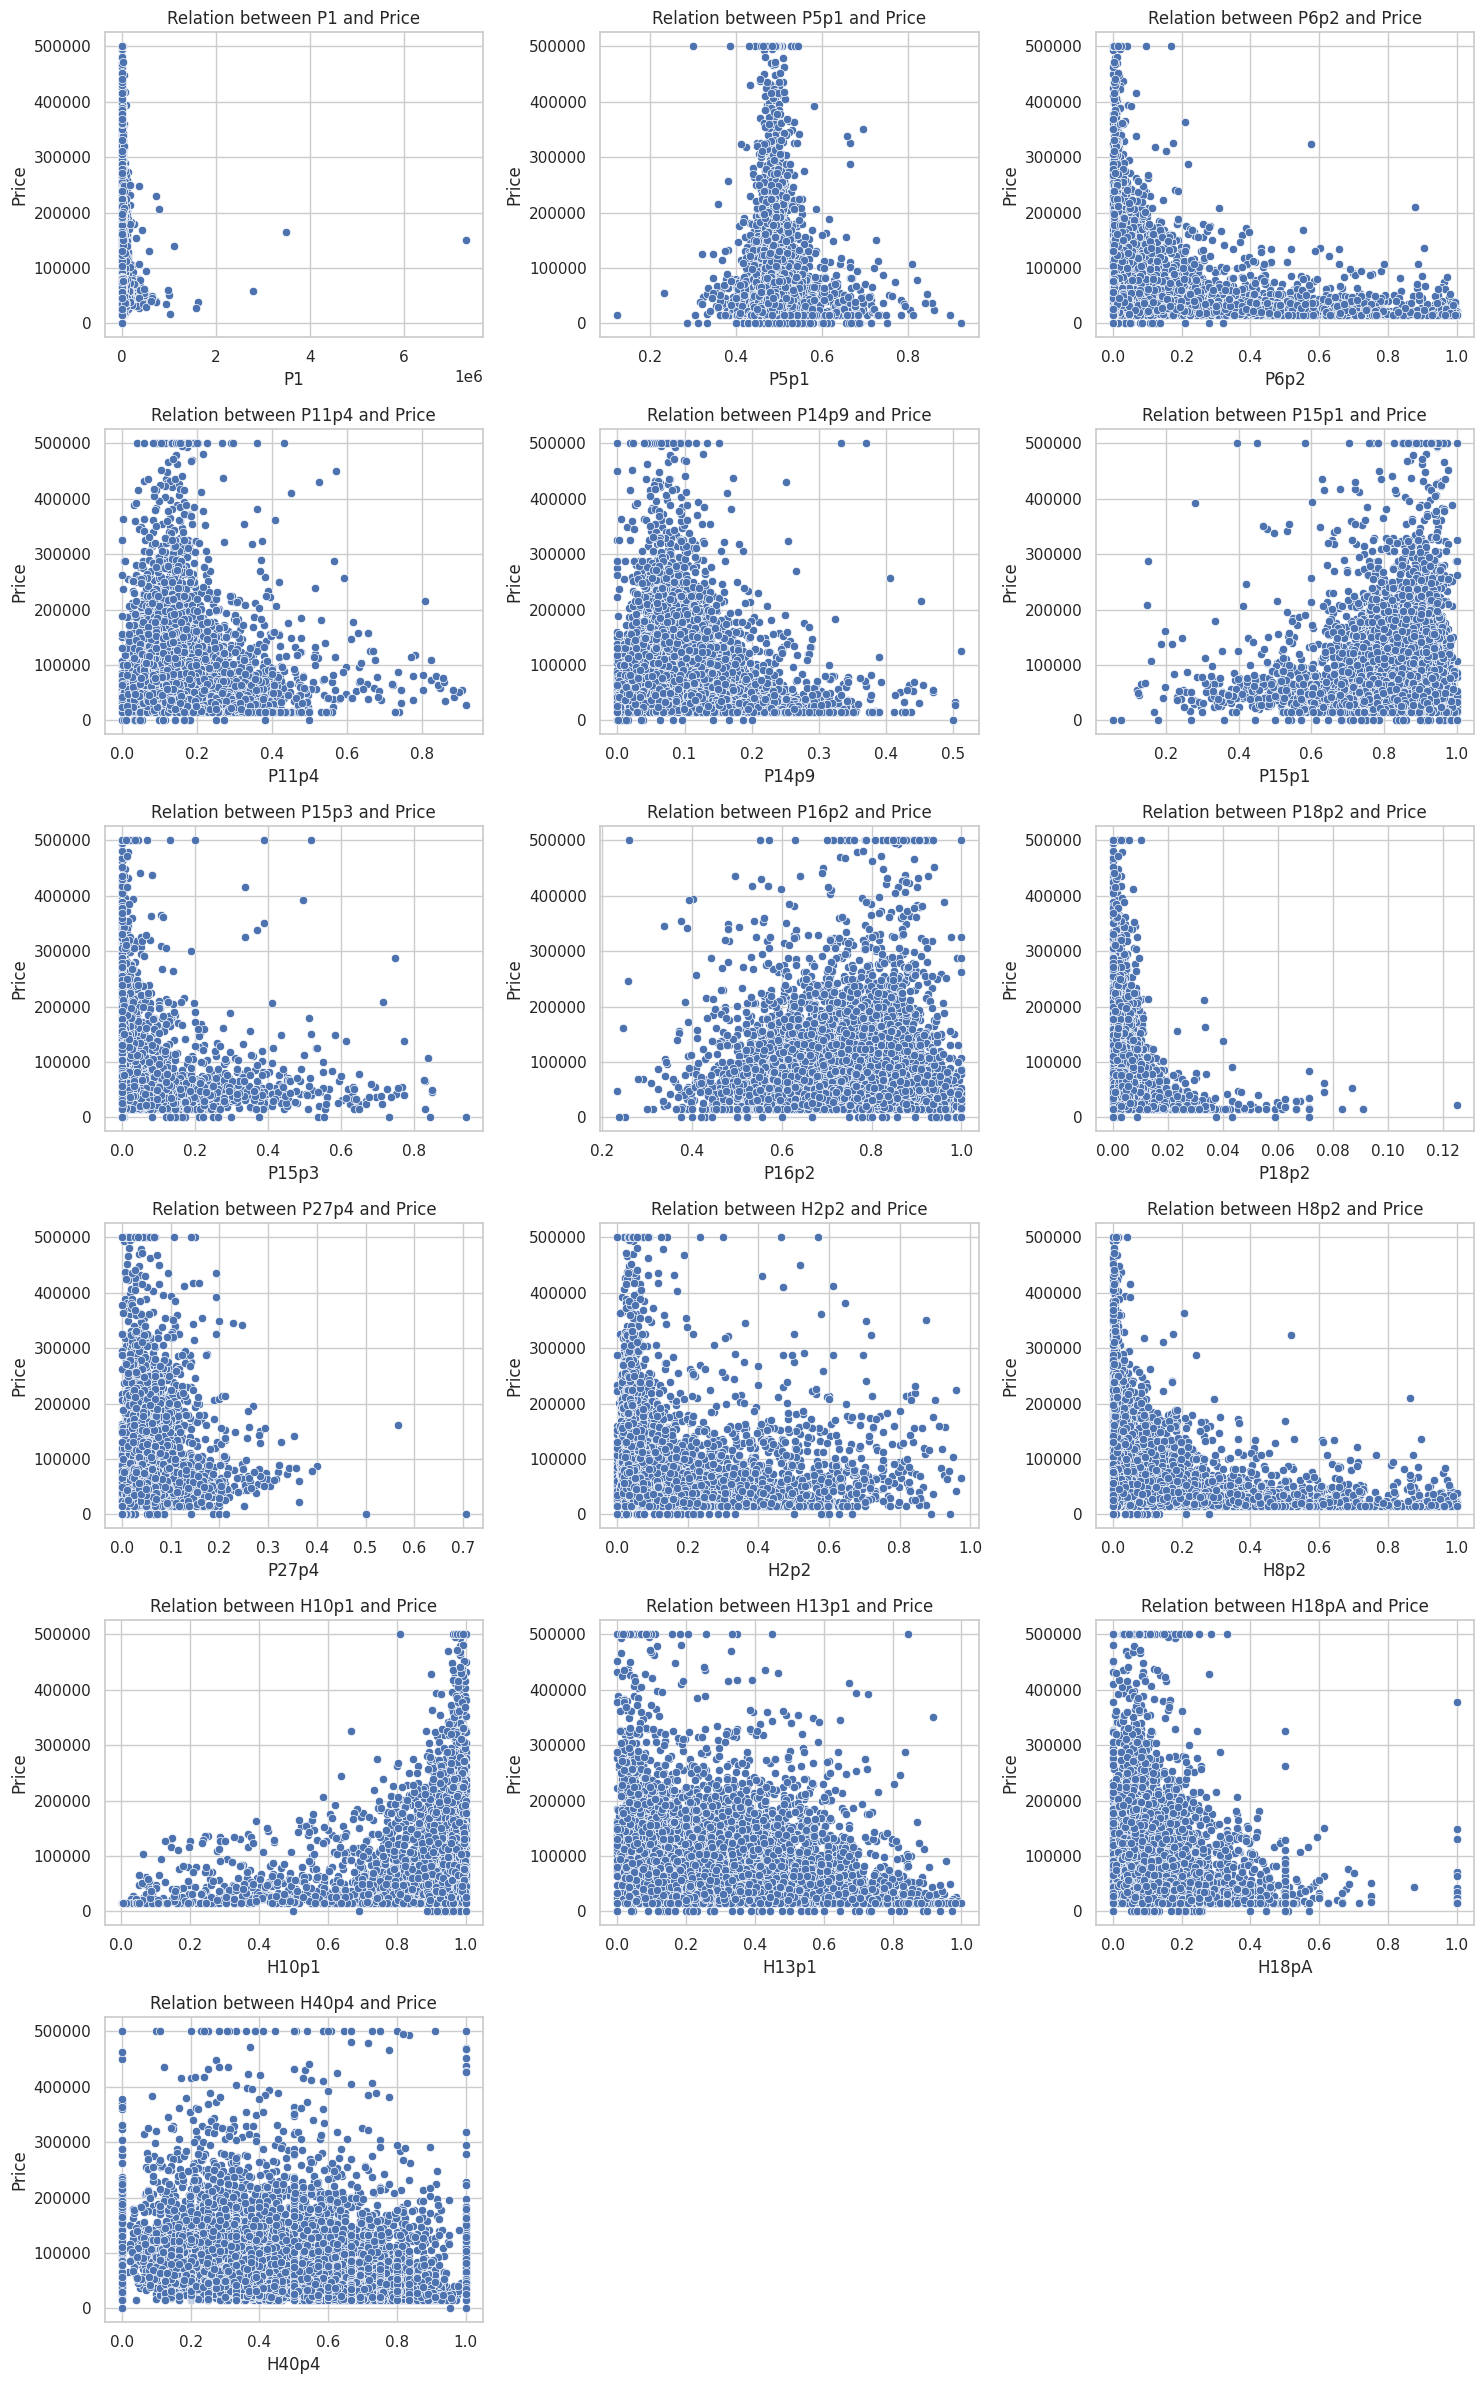

In [6]:
sns.set(style="whitegrid")

num_features = len(X.columns)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()

for i, feature in enumerate(X.columns):
    sns.scatterplot(x=X[feature], y=y, ax=axes[i])
    axes[i].set_title(f'Relation between {feature} and Price')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Price')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

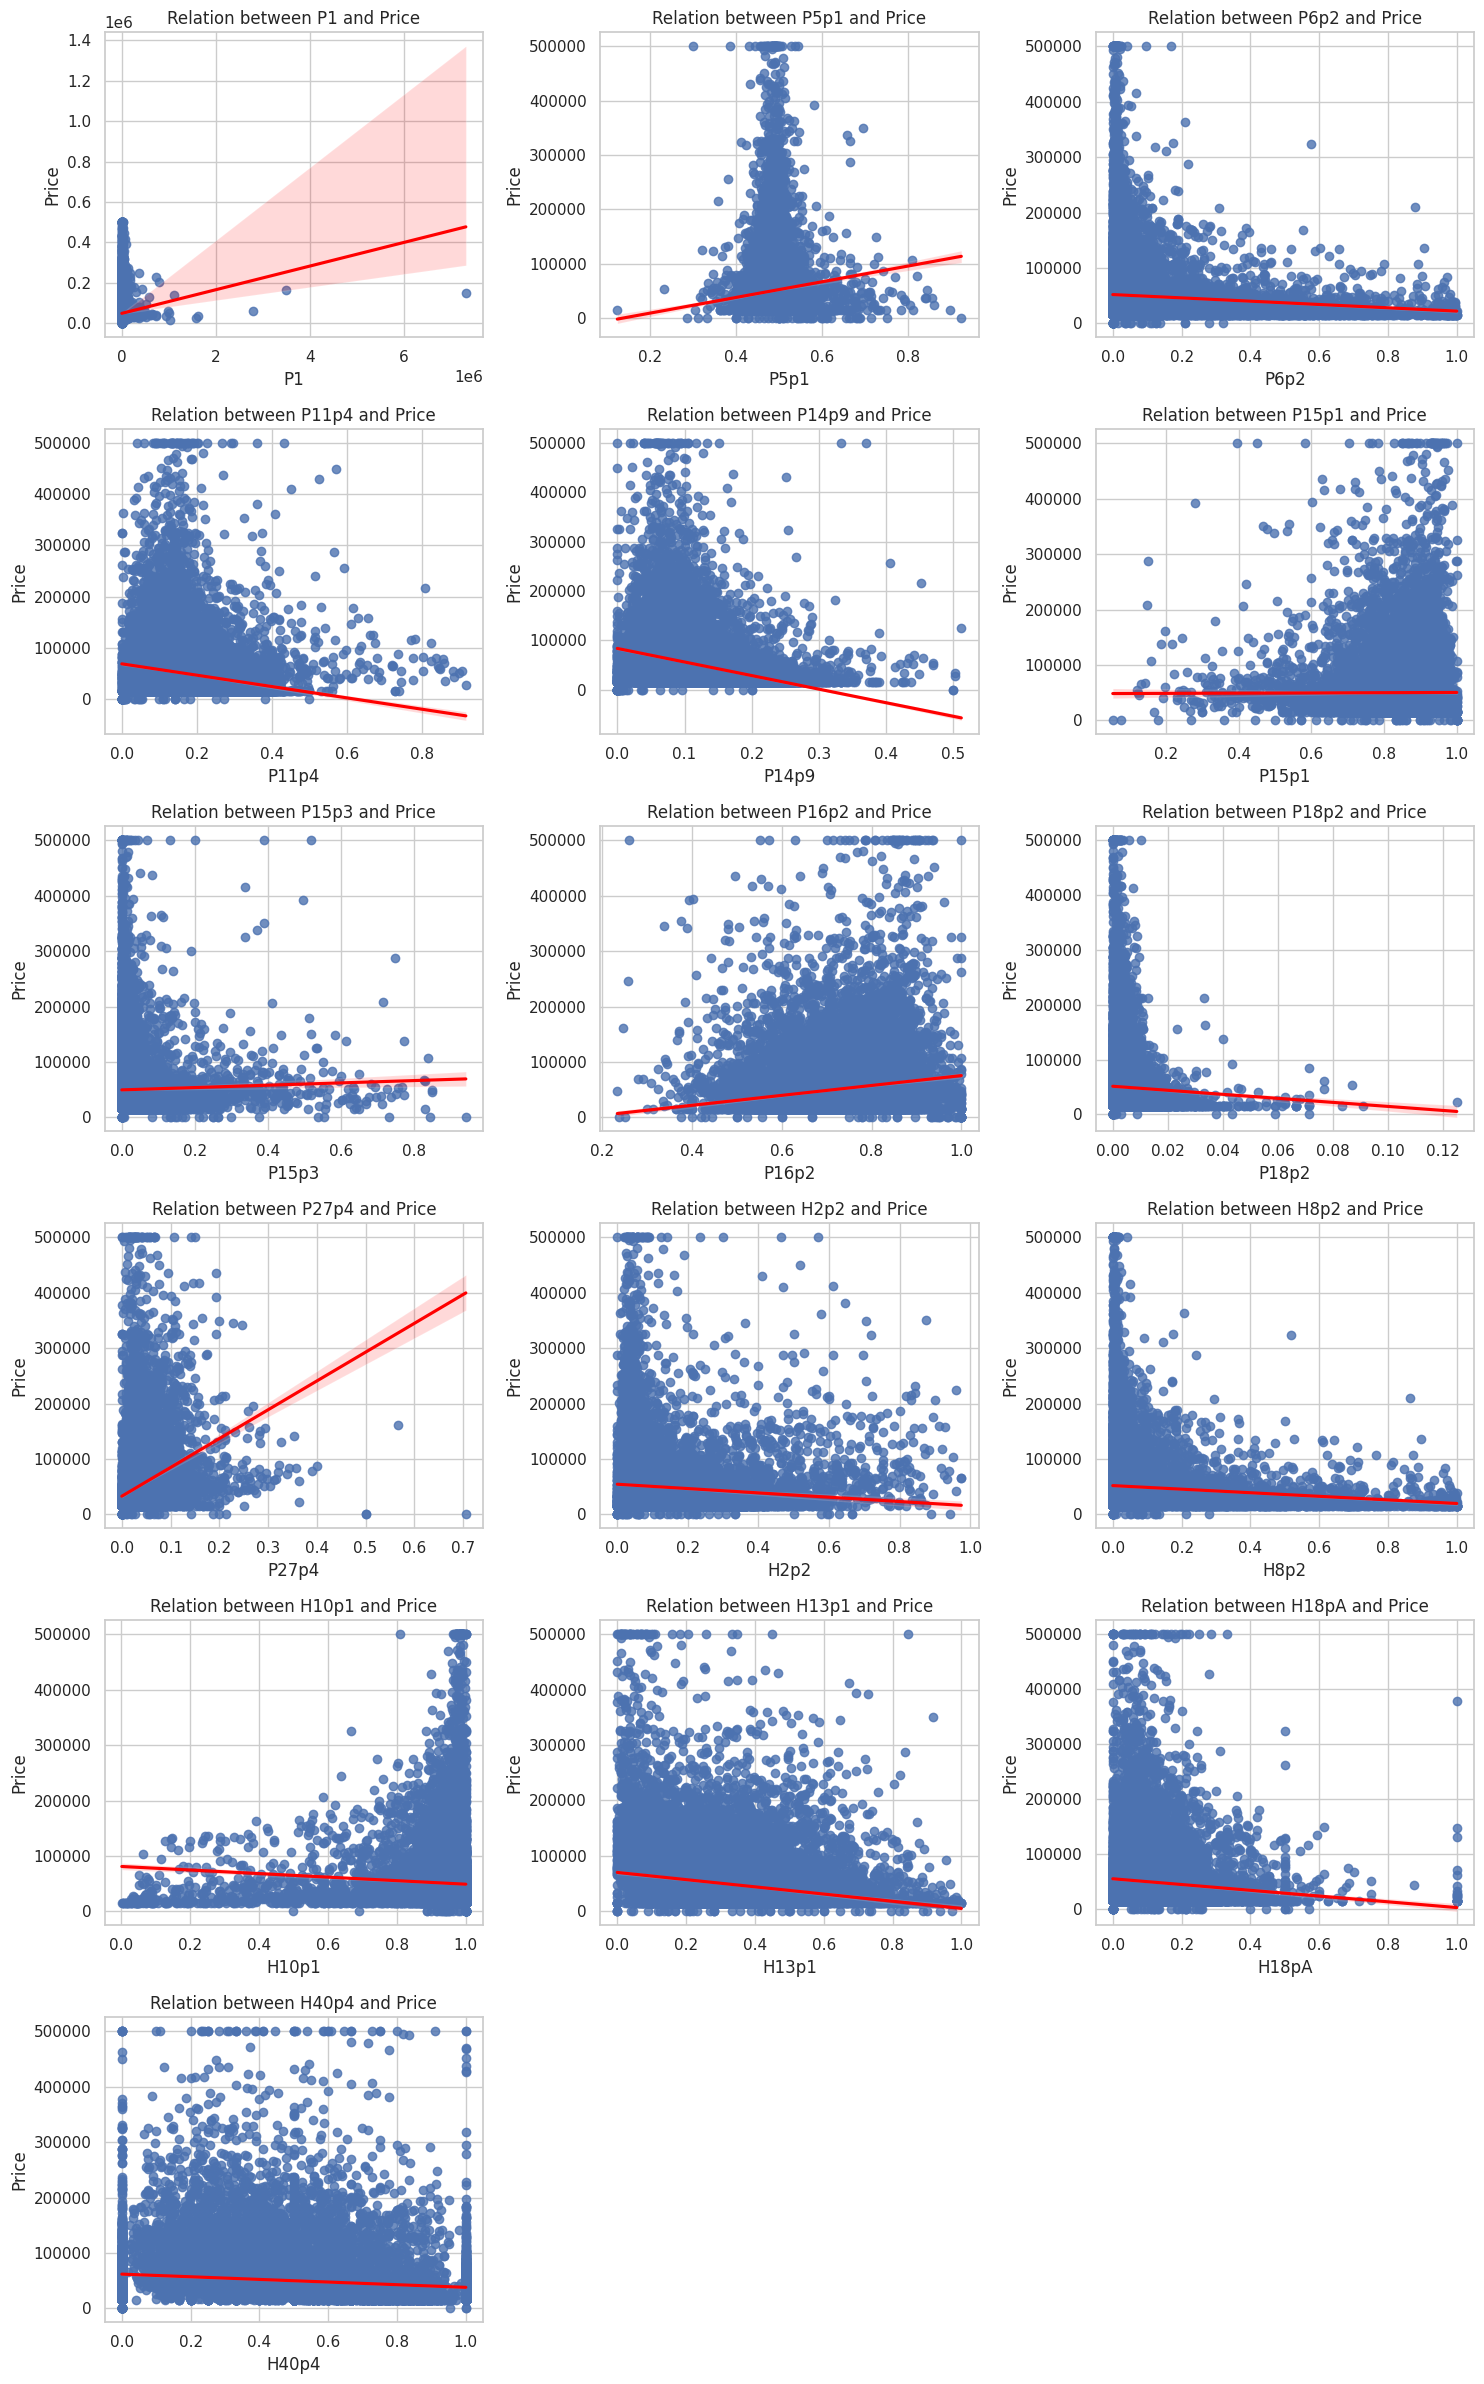

In [7]:
sns.set(style="whitegrid")

num_features = len(X.columns)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()

for i, feature in enumerate(X.columns):
    sns.regplot(x=X[feature], y=y, line_kws={"color": "red"}, ax=axes[i])
    axes[i].set_title(f'Relation between {feature} and Price')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Price')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

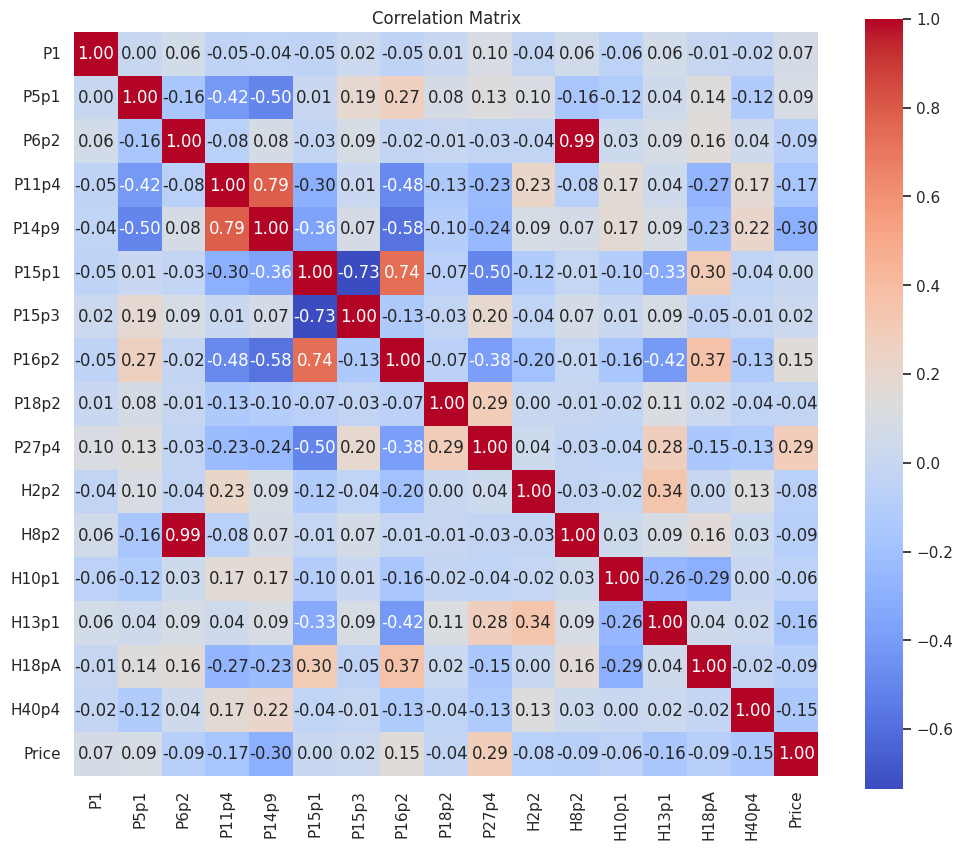

In [8]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

## TRAINNING MODEL

In [9]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)

print("MSE: ", mean_squared_error(y_test, y_pred))
print("R2_SCORE: ", r2_score(y_test, y_pred))

MSE:  1907341796.1528778
R2_SCORE:  0.25094292560256437


Text(0.5, 1.0, 'True x Predicted')

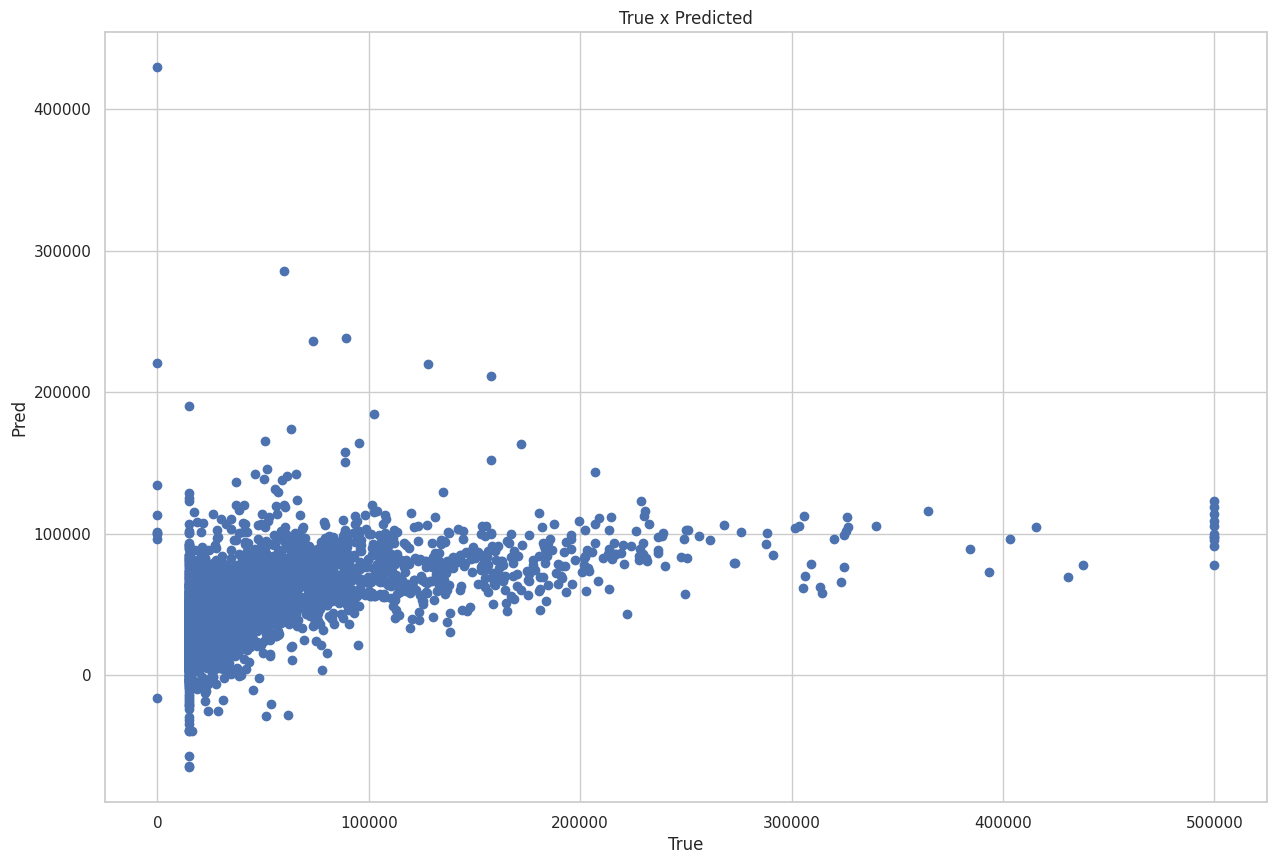

In [10]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred)
plt.xlabel("True")
plt.ylabel("Pred")
plt.title("True x Predicted")

In [11]:
pred_y_df = pd.DataFrame({"True Value": y_test, "Predicted value": y_pred, "Difference": y_test-y_pred}).round(2)
pred_y_df

,True Value,Predicted value,Difference
18788,38800,43575.93,-4775.93
5859,25500,31513.13,-6013.13
4634,40000,48093.12,-8093.12
21895,38500,45723.55,-7223.55
3115,26000,22789.75,3210.25
...,...,...,...
1905,127600,65053.49,62546.51
4007,40800,52003.10,-11203.10
11117,26300,30364.49,-4064.49
10984,43400,39471.51,3928.49


In [12]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Regression - MSE: {mse_ridge}')
print(f'Ridge Regression - R² Score: {r2_ridge}')

Ridge Regression - MSE: 1918526071.6333134
Ridge Regression - R² Score: 0.2465506029011335


In [13]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Regression - MSE: {mse_lasso}')
print(f'Lasso Regression - R² Score: {r2_lasso}')


Lasso Regression - MSE: 1907277987.7654343
Lasso Regression - R² Score: 0.2509679846266558
